In [3]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import math

# Poisson probability with the `scipy` library

The following lines of code show the `scipy` implementation on how to compute the Poisson probability $P(x=k|\lambda)$ of observing $x=k$ events when $\lambda$ are expected:

$$
P(x=k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
$$

In [4]:
k = 5
_lambda = 4
scipy.stats.poisson.pmf(k,_lambda)

0.1562934518505317

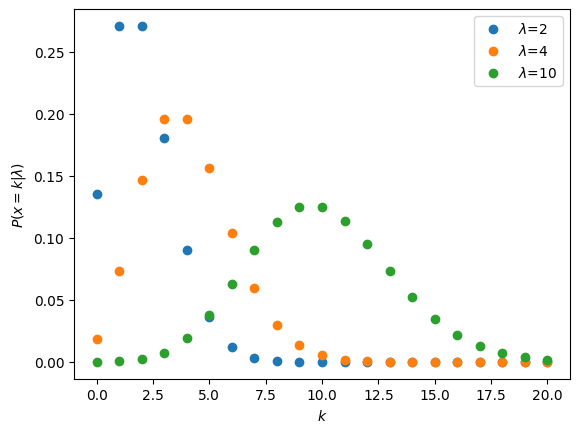

In [5]:
k=np.arange(0,21,1)

for _lambda in [2,4,10]:
  poisson_prob = scipy.stats.poisson.pmf(k,_lambda)
  plt.plot(k,poisson_prob,'o',label=rf'$\lambda$={_lambda}')

plt.xlabel(r'$k$')
plt.ylabel(r'$P(x=k|\lambda)$')
plt.legend()
plt.show()

# Preamble

Consider a HEP experiment measuring an observable distributed in a 3-bin histogram.

Monte-Carlo methods were used to simulate this observable for signal and background processes and theory was used to predict the total number of events expected for both, yielding:

*   Expected signal: $S_i=\{34,67,42\}$
*   Expected background: $B_i=\{404,376,198\}$

The real data measurement was:

*   Real data measurement: $N_i=\{489,541,302\}$

# Exercise 1: Likelihood model

Consider the likelihood model for the statistical analysis of the experiment above, consisting of:

- A three-bin distribution of the observations
- Two expected samples: a **signal sample** and a **background sample**
- A normalization scaling factor $\mu$, the **signal strength**, for the signal sample.

The only parameter of interest in this likelihood model is $\mu$ and there are no additional nuisance parameters.

## 1a) Likelihood function

Define a python function based on `scipy` to compute the likelihood model described above.


In [6]:
# your answer

def likelihood(N_, S_, B_, mu_):
    return np.prod(scipy.stats.poisson.pmf(N_, mu_ * S_ + B_))

## 1b) Likelihood value for the observations
Use the function defined in line 1a) to calculate the likelihood for the observations described in the preamble, given the theoretical expectations for the signal and the background also described there (i.e. assuming that the normalisation of the simulation is correct).


In [7]:
# your answer

# Real Data Measurement, Expected Background and Expected Signal
N = np.array([489, 541, 302])
B = np.array([404, 376, 198])
S = np.array([34, 67, 42])
mu = 1                              # assuming that the normalisation of the simulation is correct

# Apply the function 
likelihood_value = likelihood(N, S, B, mu)
print(f"Likelihood: {likelihood_value}")

Likelihood: 1.005889355733455e-14


# Exercise 2: Best-fit signal strength $\hat{\mu}$

Consider the experiment and results described in the preamble.

## 2a) $\hat{\mu}>1$  or  $\hat{\mu}<1$ ?

Qualitatively, do you expect the best-fit value $\hat{\mu}$ to be larger or smaller than 1? Justify your answer.

**Your answer:**  Since the sum of the signal S with the background B is less than the measured values, it means that more events were observed than the expected by the model. Therefore, the best-fit value of $\hat{\mu}$ is expected to be larger than 1. 

## 2b) Log-likelihood as a function of $\mu$
Draw the log-likelihood as a function of the parameter $\mu$.


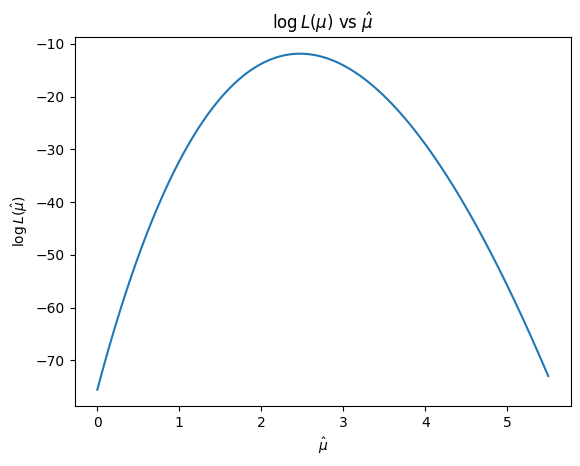

In [8]:
#Your answer
def log_likelihood(mu_array_):
    result = np.log([likelihood(N, S, B, mu_) for mu_ in mu_array_])
    return np.asarray(result)

mu = np.linspace(0, 5.5, 7000)
log_likelihood_value = log_likelihood(mu)

plt.plot(mu, log_likelihood_value)
plt.xlabel(rf'$\hat \mu$')
plt.ylabel(rf'$\log L(\hat \mu)$')
plt.title(rf'$\log L(\mu)$ vs $\hat \mu$')
plt.show()

## 2c) Best-fit signal strength $\hat{\mu}$

Find the approximate best-fit value of $\hat{\mu}$.

In [10]:
# Your answer
mu_hat_index = np.argmax(log_likelihood_value)  # Find the index of the maximum value of the log likelihood
mu_hat = mu[mu_hat_index]                       # Find the value of mu corresponding to the maximum value of the log likelihood

print(f"The best-fit value of mu is: {mu_hat}")

The best-fit value of mu is: 2.4729961423060436


## 2d) Uncertainty on $\hat{\mu}$

Find the approximate value for the uncertainty on $\hat{\mu}$.

##### Answer:
Using: $\ln\Bigl(L(\hat \mu)\Bigr) - \ln\Bigl(L(\mu)\Bigr) = \frac{1}{2}$,

corresponding to “one-sigma” uncertainty.

In [19]:
def uncertainty(log_likelihood_value, mu_hat_index, factor, tolerance):
    logL_mu = log_likelihood_value[mu_hat_index] - factor
    index = np.where(np.abs(log_likelihood_value - logL_mu) <= tolerance)[0]
    uncertainty = -(mu[mu_hat_index] - mu[index])
    return uncertainty

# Calculate the uncertainty for 1 sigma, using a tolerance of 0.0015 for the difference between the log likelihood and the factor
uncertainty_1sigma = uncertainty(log_likelihood_value, mu_hat_index, 0.5, 0.0015)
print(f"Uncertainty for 1 sigma (left and right uncertainty): {uncertainty_1sigma}")

# Choosing the largest value of the uncertainty
uncertainty_1sigma = np.max(uncertainty_1sigma)
print(f"Uncertainty for 1 sigma (largest): {uncertainty_1sigma}")

Uncertainty for 1 sigma (left and right uncertainty): [-0.24360623  0.24832119]
Uncertainty for 1 sigma (largest): 0.24832118874124864


# Exercise 3: Significance calculation

Assuming the expression for a counting experiment, calculate the expected and observed signal significance taking into account the total number of signal, background or observed events (as needed).

## 3a) Expected significance


In [22]:
#Your answer
# compute the expected signal significance
def expected_signal_significance(S_, B_):
    sum_S = np.sum(S_)
    sum_B = np.sum(B_)
    return sum_S / np.sqrt(sum_B)

# compute the observed signal significance
expected_ss = expected_signal_significance(S, B)
print(f"Expected Signal Significance: {expected_ss}")

Expected Signal Significance: 4.572635777646218


## 3b) Observed significance

In [37]:
#Your answer

# Calculate the likelihood ratio
mu_hat = mu[mu_hat_index]
LR = likelihood(N, S, B, mu_ = 1)/likelihood(N, S, B, mu_ = mu_hat)
print(f"The likelihood ratio is: {LR}")

# Calculate the significance
Z = np.sqrt(-2*np.log(LR))
print(f"The significance is: {Z}")

The likelihood ratio is: 1.4187843380784777e-09
The significance is: 6.383332269581588
